In [2]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

C:\Users\SOMA\AppData\Roaming\Python\Python311\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\SOMA\AppData\Roaming\Python\Python311\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\SOMA\AppData\Roaming\Python\Python311\site-packages\numpy\.libs\libopenblas64__v0.3.23-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [3]:
dataset = pd.read_csv("bodyfind.csv")
X=dataset.iloc[:,:-1].values
Y=dataset.iloc[:,20].values
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
X_train_flattened = X_train.reshape(len(X_train),20)
X_test_flattened = X_test.reshape(len(X_test),20)

In [10]:
model = keras.Sequential([
    
    keras.layers.Dense(19,input_shape=(20,),activation='relu'),
    keras.layers.Dense(300,activation='relu'),
    keras.layers.Dense(250,activation='relu'),
    keras.layers.Dense(200,activation='relu'),
    keras.layers.Dense(150,activation='relu'),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(45,activation='relu'),
    keras.layers.Dense(30,activation='relu'),
    keras.layers.Dense(20,activation='relu'),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dense(6,activation='sigmoid')
   
    
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flattened,y_train,epochs=11)

Epoch 1/11
30/30 [==============================] - 2s 3ms/step - loss: 1.5651 - accuracy: 0.4604
Epoch 2/11
30/30 [==============================] - 0s 3ms/step - loss: 1.1284 - accuracy: 0.5615
Epoch 3/11
30/30 [==============================] - 0s 3ms/step - loss: 0.7790 - accuracy: 0.6823
Epoch 4/11
30/30 [==============================] - 0s 3ms/step - loss: 0.5962 - accuracy: 0.7604
Epoch 5/11
30/30 [==============================] - 0s 3ms/step - loss: 0.3474 - accuracy: 0.8573
Epoch 6/11
30/30 [==============================] - 0s 3ms/step - loss: 0.3202 - accuracy: 0.8813
Epoch 7/11
30/30 [==============================] - 0s 3ms/step - loss: 0.2300 - accuracy: 0.9052
Epoch 8/11
30/30 [==============================] - 0s 3ms/step - loss: 0.1574 - accuracy: 0.9417
Epoch 9/11
30/30 [==============================] - 0s 3ms/step - loss: 0.1302 - accuracy: 0.9510
Epoch 10/11
30/30 [==============================] - 0s 4ms/step - loss: 0.1295 - accuracy: 0.9583
Epoch 11/11
30/30 [

8/8 [==============================] - 0s 2ms/step


Text(95.72222222222221, 0.5, 'Actual')

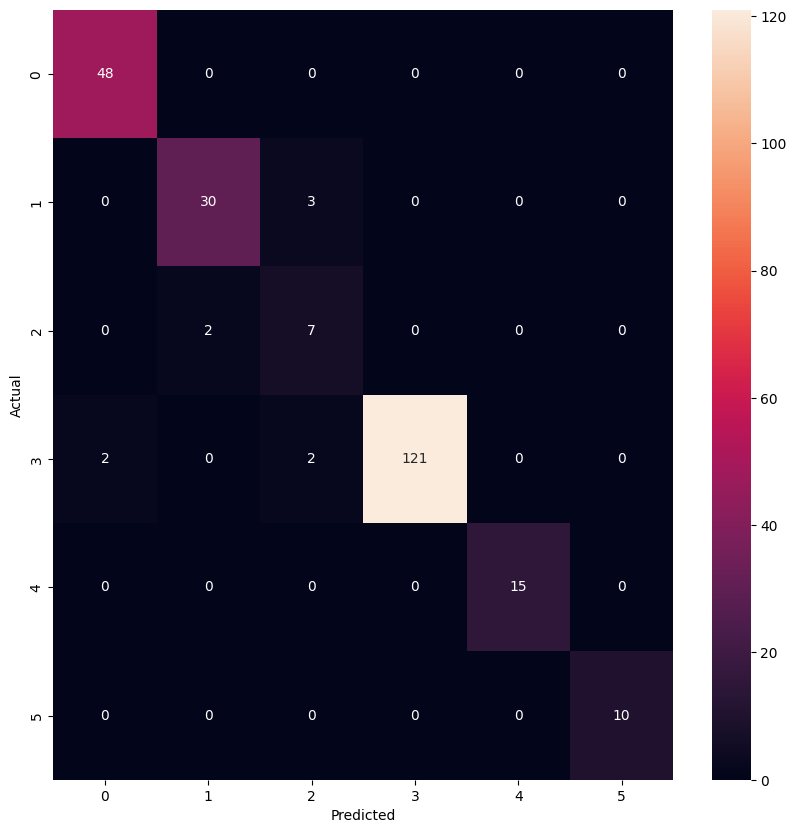

In [11]:
y_predict = model.predict(X_test_flattened)
y_predict_labels = [np.argmax(i) for i in y_predict]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predict_labels)
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [6]:
# model_json = model.to_json()

# # Save the model JSON to a file
# model_path = 'D:\prakriti-analysis\ml\model.json'
# with open(model_path, 'w') as json_file:
#     json_file.write(model_json)

# print("Model saved as JSON file: {model_path}")


In [12]:
model.save('prakriti-model')

INFO:tensorflow:Assets written to: prakriti-model\assets


INFO:tensorflow:Assets written to: prakriti-model\assets


In [15]:
print(X_train[0])

print(y_train[0])
print(X_train_flattened[0])

[1 1 0 1 1 0 2 0 0 0 2 0 0 0 1 1 0 0 1 0]
0
[1 1 0 1 1 0 2 0 0 0 2 0 0 0 1 1 0 0 1 0]
